In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout ,LSTM

Importing data

In [146]:
start='2000-01-01'
end='2024-05-02'
stock='GOOG'
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [147]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2024-04-25,153.360001,158.279999,152.768005,157.949997,157.949997,36197800
2024-04-26,175.990005,176.419998,171.399994,173.690002,173.690002,56500800
2024-04-29,170.770004,171.380005,167.059998,167.899994,167.899994,35914600


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4959 entries, 2004-08-19 to 2024-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4959 non-null   float64
 1   High       4959 non-null   float64
 2   Low        4959 non-null   float64
 3   Close      4959 non-null   float64
 4   Adj Close  4959 non-null   float64
 5   Volume     4959 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 271.2 KB


adding index

In [149]:
data.reset_index(inplace=True)

In [150]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


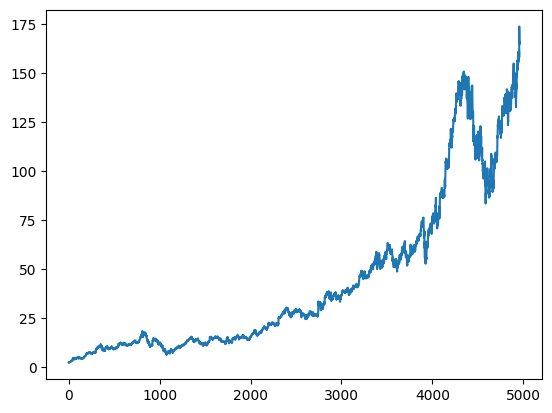

In [151]:
plt.plot(data.Close)

Moving average of 100 days

In [152]:
ma100= data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4954    145.289300
4955    145.693000
4956    146.065699
4957    146.388199
4958    146.729600
Name: Close, Length: 4959, dtype: float64

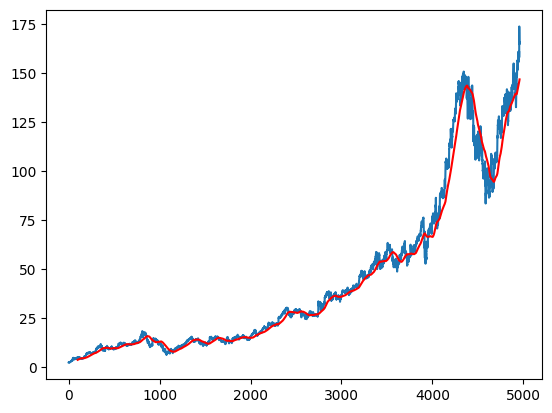

In [153]:
plt.plot(data.Close)
plt.plot(ma100,"r")

moving average of 200 days

In [154]:
ma200= data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4954    139.05775
4955    139.32810
4956    139.54345
4957    139.73815
4958    139.94070
Name: Close, Length: 4959, dtype: float64

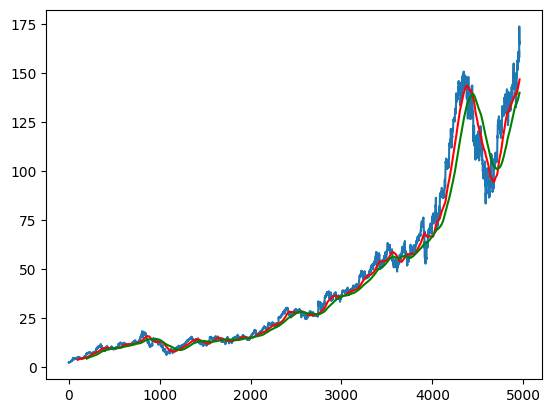

In [155]:
plt.plot(data.Close)
plt.plot(ma100,"r")
plt.plot(ma200,"g")

Spliting data into Training and Testing

In [156]:
data_train=pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_test=pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])

In [157]:
data_train.head()

,Close
0,2.499133
1,2.697639
2,2.724787
3,2.611960
4,2.640104


In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_train_scaled=scaler.fit_transform(data_train)
data_train_scaled

array([[1.46004211e-04],
       [3.67179544e-03],
       [4.15398877e-03],
       ...,
       [9.04051578e-01],
       [9.19317729e-01],
       [9.49965418e-01]])

In [159]:
x=[]
y=[]
for i in range(100,data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100:i])
    y.append(data_train_scaled[i,0])

In [160]:
x,y=np.array(x),np.array(y)

making model

In [161]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [162]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_25 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_41 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_26 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_42 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_27 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_43 (LSTM)              (None, 120)             

In [163]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [164]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
106/106 [==============================] - 37s 294ms/step - loss: 0.0206
Epoch 2/50
106/106 [==============================] - 33s 310ms/step - loss: 0.0052
Epoch 3/50
106/106 [==============================] - 38s 363ms/step - loss: 0.0040
Epoch 4/50
106/106 [==============================] - 50s 469ms/step - loss: 0.0043
Epoch 5/50
106/106 [==============================] - 32s 303ms/step - loss: 0.0035
Epoch 6/50
106/106 [==============================] - 42s 395ms/step - loss: 0.0033
Epoch 7/50
106/106 [==============================] - 40s 373ms/step - loss: 0.0031
Epoch 8/50
106/106 [==============================] - 38s 363ms/step - loss: 0.0029
Epoch 9/50
106/106 [==============================] - 38s 357ms/step - loss: 0.0028
Epoch 10/50
106/106 [==============================] - 46s 435ms/step - loss: 0.0025
Epoch 11/50
106/106 [==============================] - 48s 455ms/step - loss: 0.0023
Epoch 12/50
106/106 [==============================] - 31s 290ms/step - lo

In [165]:
pas_100_days=data_test.tail(100)

In [166]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [167]:
data_test_scaled=scaler.fit_transform(data_test)

In [168]:
x=[]
y=[]
for i in range(100,data_test_scaled.shape[0]):
    x.append(data_test_scaled[i-100:i])
    y.append(data_test_scaled[i,0])
x,y=np.array(x),np.array(y)

In [169]:
y_pred=model.predict(x)

47/47 [==============================] - 8s 151ms/step


In [170]:
s=1/scaler.scale_

In [171]:
y_pred=y_pred*s

In [172]:
y=y*s

graph of actual price VS predicted price

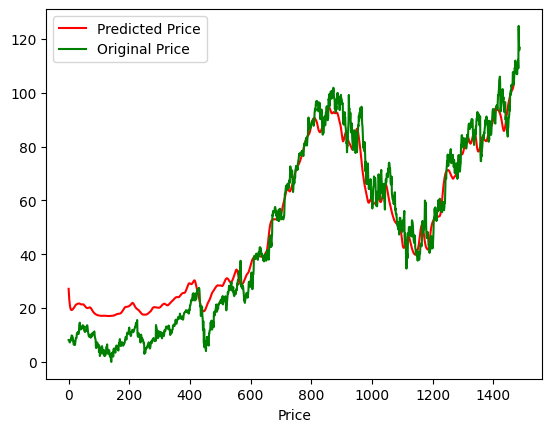

In [175]:
plt.plot(y_pred[20:],"r",label="Predicted Price")
plt.plot(y,"g",label="Original Price")
plt.xlabel('Time')
plt.xlabel('Price')
plt.legend()

Saving model

In [176]:
model.save("PredictionModel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
